<a href="https://colab.research.google.com/github/srujanperam/dl_1/blob/main/notebooks/Handling_imbalanced_dataset_in_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/codebasics/py/master/DeepLearningML/14_imbalanced/customer_churn.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6940,2314-TNDJQ,Female,0,Yes,Yes,72,No,No phone service,DSL,Yes,Yes,Yes,Yes,No,Yes,Two year,No,Credit card (automatic),55.65,3880.05,No
3140,7901-HXJVA,Male,0,No,No,14,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Electronic check,76.45,1117.55,No
2555,1849-RJYIG,Female,0,No,No,8,Yes,No,DSL,Yes,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,60.00,487.75,No
1546,7114-AEOZE,Female,0,No,No,60,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),19.85,1128.1,No
4113,3982-JGSFD,Male,0,No,No,36,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Credit card (automatic),20.35,695.85,No


In [3]:
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [4]:
517400/df.shape[0]


73.46301292063042

In [5]:
df.drop('customerID',axis='columns',inplace=True)


In [6]:
df.dtypes


gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
df.TotalCharges.values


array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [8]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()


0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [9]:

df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [10]:
df.shape


(7043, 20)

In [11]:
df.iloc[488].TotalCharges


' '

In [12]:
df[df.TotalCharges!=' '].shape


(7032, 20)

In [13]:
df1 = df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [14]:
df1.dtypes


gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [15]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)


/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [16]:
df1.TotalCharges.values


array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [17]:
df1[df1.Churn=='No']


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


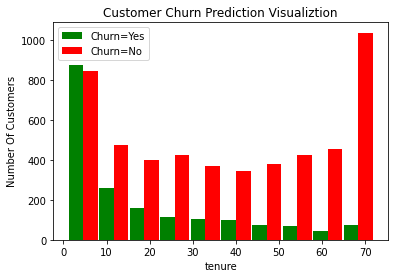

In [18]:
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

blood_sugar_men = [113, 85, 90, 150, 149, 88, 93, 115, 135, 80, 77, 82, 129]
blood_sugar_women = [67, 98, 89, 120, 133, 150, 84, 69, 89, 79, 120, 112, 100]

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


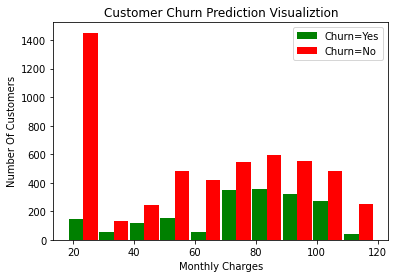

In [19]:

mc_churn_no = df1[df1.Churn=='No'].MonthlyCharges      
mc_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges      

plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

blood_sugar_men = [113, 85, 90, 150, 149, 88, 93, 115, 135, 80, 77, 82, 129]
blood_sugar_women = [67, 98, 89, 120, 133, 150, 84, 69, 89, 79, 120, 112, 100]

plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [20]:

def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}')

In [21]:
print_unique_col_values(df1)


gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [22]:

df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4389: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [23]:
print_unique_col_values(df1)


gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [24]:

yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df1[col].replace({'Yes': 1,'No': 0},inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [25]:
for col in df1:
    print(f'{col}: {df1[col].unique()}')

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [26]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)


/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [27]:
df1.gender.unique()


array([1, 0])

In [28]:

df2 = pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [29]:
df2.sample(5)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3027,1,0,0,0,8,1,0,0,0,0,0,0,0,1,20.70,137.60,0,0,0,1,1,0,0,0,0,0,1
6633,1,0,0,0,1,1,1,0,0,0,0,0,0,1,74.50,74.50,1,0,1,0,1,0,0,0,0,1,0
2851,1,0,1,1,64,1,1,1,1,1,1,1,1,1,90.60,5817.45,0,1,0,0,0,0,1,0,0,0,1
4449,1,0,0,0,60,1,1,0,1,1,0,1,1,0,104.70,6333.80,0,0,1,0,0,0,1,0,0,1,0
4644,0,0,0,0,13,1,0,0,0,0,1,0,0,1,50.55,610.75,0,1,0,0,1,0,0,0,0,0,1


In [30]:
df2.dtypes


gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [31]:

cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [32]:
for col in df2:
    print(f'{col}: {df2[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

In [33]:

X = df2.drop('Churn',axis='columns')
y = testLabels = df2.Churn.astype(np.float32)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [34]:
y_train.value_counts()


0.0    4130
1.0    1495
Name: Churn, dtype: int64

In [35]:
y.value_counts()


0.0    5163
1.0    1869
Name: Churn, dtype: int64

In [36]:
5163/1869


2.7624398073836276

In [37]:
y_test.value_counts()


0.0    1033
1.0     374
Name: Churn, dtype: int64

In [38]:
X_train.shape


(5625, 26)

In [39]:
X_test.shape


(1407, 26)

In [40]:
len(X_train.columns)


26

In [41]:
from tensorflow_addons import losses
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix , classification_report

In [42]:
def ANN(X_train, y_train, X_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(26, input_dim=26, activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
    
    if weights == -1:
        model.fit(X_train, y_train, epochs=100)
    else:
        model.fit(X_train, y_train, epochs=100, class_weight = weights)
    
    print(model.evaluate(X_test, y_test))
    
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    
    print("Classification Report: \n", classification_report(y_test, y_preds))
    
    return y_preds

In [43]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
176/176 [==============================] - 1s 1ms/step - loss: 0.6008 - accuracy: 0.6573
Epoch 2/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4423 - accuracy: 0.7922
Epoch 3/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4322 - accuracy: 0.7910
Epoch 4/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4109 - accuracy: 0.8074
Epoch 5/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4184 - accuracy: 0.7999
Epoch 6/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4173 - accuracy: 0.8045
Epoch 7/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4102 - accuracy: 0.8055
Epoch 8/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3982 - accuracy: 0.8169
Epoch 9/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3992 - accuracy: 0.8139
Epoch 10/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4068 - accura

In [44]:
# Method 1: Undersampling¶
# Class count
count_class_0, count_class_1 = df1.Churn.value_counts()

# Divide by class
df_class_0 = df2[df2['Churn'] == 0]
df_class_1 = df2[df2['Churn'] == 1]

In [45]:
# Undersample 0-class and concat the DataFrames of both class
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.Churn.value_counts())

Random under-sampling:
1    1869
0    1869
Name: Churn, dtype: int64


In [46]:
X = df_test_under.drop('Churn',axis='columns')
y = df_test_under['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [47]:

# Number of classes in training Data
y_train.value_counts()

1    1495
0    1495
Name: Churn, dtype: int64

In [48]:

y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 1s 1ms/step - loss: 0.6397 - accuracy: 0.6469
Epoch 2/100
94/94 [==============================] - 0s 1ms/step - loss: 0.5379 - accuracy: 0.7371
Epoch 3/100
94/94 [==============================] - 0s 1ms/step - loss: 0.5030 - accuracy: 0.7580
Epoch 4/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4870 - accuracy: 0.7709
Epoch 5/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4876 - accuracy: 0.7534
Epoch 6/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4880 - accuracy: 0.7569
Epoch 7/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4781 - accuracy: 0.7697
Epoch 8/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4813 - accuracy: 0.7617
Epoch 9/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4678 - accuracy: 0.7798
Epoch 10/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4644 - accuracy: 0.7820
Epoch 11/

In [49]:
# Oversample 1-class and concat the DataFrames of both classes
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.Churn.value_counts())

Random over-sampling:
1    5163
0    5163
Name: Churn, dtype: int64


In [50]:
X = df_test_over.drop('Churn',axis='columns')
y = df_test_over['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [51]:
# Number of classes in training Data
y_train.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [52]:
loss = keras.losses.BinaryCrossentropy()
weights = -1
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 1s 1ms/step - loss: 0.5854 - accuracy: 0.6891
Epoch 2/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4915 - accuracy: 0.7551
Epoch 3/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4775 - accuracy: 0.7677
Epoch 4/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4683 - accuracy: 0.7721
Epoch 5/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4729 - accuracy: 0.7717
Epoch 6/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4725 - accuracy: 0.7698
Epoch 7/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4590 - accuracy: 0.7779
Epoch 8/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4634 - accuracy: 0.7815
Epoch 9/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4584 - accuracy: 0.7825
Epoch 10/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4655 - accura

In [53]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [56]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_sample(X, y)

y_sm

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


array([0, 0, 1, ..., 1, 1, 1])

In [57]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 1s 1ms/step - loss: 0.5874 - accuracy: 0.6816
Epoch 2/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4855 - accuracy: 0.7629
Epoch 3/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4911 - accuracy: 0.7609
Epoch 4/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4820 - accuracy: 0.7650
Epoch 5/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4683 - accuracy: 0.7766
Epoch 6/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4665 - accuracy: 0.7722
Epoch 7/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4609 - accuracy: 0.7813
Epoch 8/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4617 - accuracy: 0.7755
Epoch 9/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4550 - accuracy: 0.7815
Epoch 10/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4597 - accura

In [58]:
df2.Churn.value_counts()


0    5163
1    1869
Name: Churn, dtype: int64

In [59]:
# Regain Original features and labels
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [61]:
y_train.value_counts()


0    4130
1    1495
Name: Churn, dtype: int64

In [62]:
df3 = X_train.copy()
df3['Churn'] = y_train

In [63]:
df3.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
684,1,0,0,0,0.000000,1,0,0,0,0,0,0,0,0,0.525871,0.006035,0,1,0,1,0,0,0,0,0,1,0
2446,1,0,0,0,0.239437,1,1,0,1,0,0,1,0,1,0.713930,0.174077,0,1,0,1,0,0,0,1,0,0,1
1680,0,0,1,1,0.774648,1,1,0,0,0,0,0,0,1,0.061692,0.163034,0,0,1,0,1,0,0,0,0,1,0
2220,0,0,1,0,1.000000,1,0,1,1,0,1,1,1,1,0.607960,0.661718,1,0,0,0,0,1,1,0,0,0,0
2842,1,0,0,0,0.042254,0,0,1,0,1,1,0,1,0,0.298507,0.021169,1,0,0,1,0,0,0,0,0,1,0


In [64]:
df3_class0 = df3[df3.Churn==0]
df3_class1 = df3[df3.Churn==1]

In [65]:

def get_train_batch(df_majority, df_minority, start, end):
    df_train = pd.concat([df_majority[start:end], df_minority], axis=0)

    X_train = df_train.drop('Churn', axis='columns')
    y_train = df_train.Churn
    return X_train, y_train

In [66]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 0, 1495)

y_pred1 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 1s 1ms/step - loss: 0.6719 - accuracy: 0.5722
Epoch 2/100
94/94 [==============================] - 0s 1ms/step - loss: 0.5330 - accuracy: 0.7529
Epoch 3/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4787 - accuracy: 0.7807
Epoch 4/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4866 - accuracy: 0.7702
Epoch 5/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4879 - accuracy: 0.7694
Epoch 6/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4782 - accuracy: 0.7790
Epoch 7/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4891 - accuracy: 0.7692
Epoch 8/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4875 - accuracy: 0.7656
Epoch 9/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4712 - accuracy: 0.7808
Epoch 10/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4727 - accuracy: 0.7773
Epoch 11/

In [67]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 1495, 2990)

y_pred2 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 1s 1ms/step - loss: 0.6148 - accuracy: 0.7012
Epoch 2/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4998 - accuracy: 0.7664
Epoch 3/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4922 - accuracy: 0.7472
Epoch 4/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4711 - accuracy: 0.7682
Epoch 5/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4835 - accuracy: 0.7600
Epoch 6/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4598 - accuracy: 0.7834
Epoch 7/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4784 - accuracy: 0.7687
Epoch 8/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4726 - accuracy: 0.7632
Epoch 9/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4660 - accuracy: 0.7751
Epoch 10/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4730 - accuracy: 0.7797
Epoch 11/

In [68]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 2990, 4130)

y_pred3 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
83/83 [==============================] - 1s 1ms/step - loss: 0.6664 - accuracy: 0.5930
Epoch 2/100
83/83 [==============================] - 0s 1ms/step - loss: 0.5302 - accuracy: 0.7581
Epoch 3/100
83/83 [==============================] - 0s 1ms/step - loss: 0.5082 - accuracy: 0.7491
Epoch 4/100
83/83 [==============================] - 0s 1ms/step - loss: 0.4749 - accuracy: 0.7759
Epoch 5/100
83/83 [==============================] - 0s 1ms/step - loss: 0.4868 - accuracy: 0.7704
Epoch 6/100
83/83 [==============================] - 0s 1ms/step - loss: 0.4719 - accuracy: 0.7836
Epoch 7/100
83/83 [==============================] - 0s 1ms/step - loss: 0.4769 - accuracy: 0.7766
Epoch 8/100
83/83 [==============================] - 0s 1ms/step - loss: 0.4731 - accuracy: 0.7729
Epoch 9/100
83/83 [==============================] - 0s 1ms/step - loss: 0.4722 - accuracy: 0.7722
Epoch 10/100
83/83 [==============================] - 0s 1ms/step - loss: 0.4602 - accuracy: 0.7776
Epoch 11/

In [69]:
len(y_pred1)


1407

In [70]:
y_pred_final = y_pred1.copy()
for i in range(len(y_pred1)):
    n_ones = y_pred1[i] + y_pred2[i] + y_pred3[i]
    if n_ones>1:
        y_pred_final[i] = 1
    else:
        y_pred_final[i] = 0

In [71]:
cl_rep = classification_report(y_test, y_pred_final)
print(cl_rep)

              precision    recall  f1-score   support

           0       0.90      0.68      0.78      1033
           1       0.47      0.80      0.60       374

    accuracy                           0.71      1407
   macro avg       0.69      0.74      0.69      1407
weighted avg       0.79      0.71      0.73      1407

